Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

If your **Plotly** visualizations aren't working:
- You must have JavaScript enabled in your browser
- You probably want to use Chrome or Firefox
- You may need to turn off ad blockers
- [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [16]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [17]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [18]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [26]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

In [20]:
#Wrangle data function
def wrangle(data):
#Read data
  df = pd.read_csv(data,
                #Format dates
                 parse_dates=['created'],
                #Set index to date created
                 index_col='created' )
#Drop unnecessary columns
  df.drop(columns=['description', 'display_address', 'no_fee'], inplace=True)
#Fill nan with 0
  df.fillna(0, inplace=True)
#Return dataframe
  return df

In [21]:
#Apply function to df
df = wrangle(DATA_PATH + 'apartments/renthop-nyc.csv')

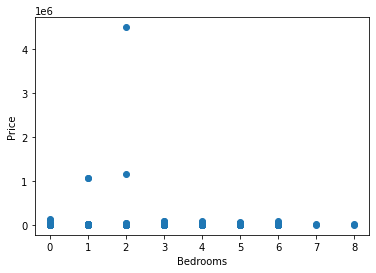

In [22]:
#Visualize for relationship
plt.scatter(df['bedrooms'], df['price'])
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show();

In [23]:
#Slpit data and check for dimensions
X = df[['bedrooms']]
y = df['price']

print('Shape of X:', X.shape)
print('Shpae of y:', y.shape)

Shape of X: (49352, 1)
Shpae of y: (49352,)


In [24]:
#Build naive model for baseline
print('Mean renatl price:', y.mean())
y_prediction = [y.mean()] * len(y)
print('Baseline MAE:', mean_absolute_error(y, y_prediction))

Mean renatl price: 3830.174035500081
Baseline MAE: 1549.6424487275


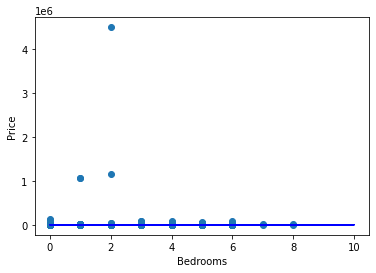

In [25]:
#Visualize baseline prediction
plt.scatter(df['bedrooms'], df['price'])
plt.plot(df['bathrooms'], y_prediction, label='Baseline', color='blue')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show();

In [27]:
#Build model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [28]:
#Predict
model.predict([[1000]])

array([1027166.19636004])

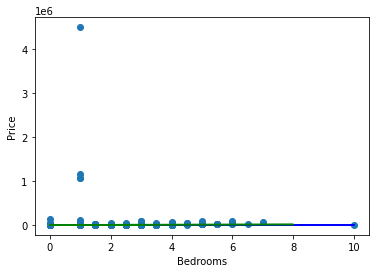

In [29]:
#Visualize prediction vs baseline
plt.scatter(df['bathrooms'], df['price'])
plt.plot(df['bathrooms'], y_prediction, label='Baseline', color='blue')
plt.plot(X, model.predict(X), label='Linear Model', color='green')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show();

In [30]:
#Check mean error
print('Baseline MAE:' ,mean_absolute_error(y, model.predict(X)))

Baseline MAE: 1306.2964665452673
